<a href="https://colab.research.google.com/github/Vanshaj-cs/Deep-Learning/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

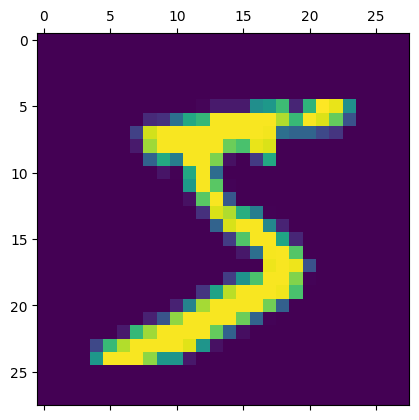

In [6]:
plt.matshow(X_train[0])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8140 - loss: 0.7263
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9144 - loss: 0.3090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9198 - loss: 0.2860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.2718


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.3035


[0.266720712184906, 0.9265999794006348]

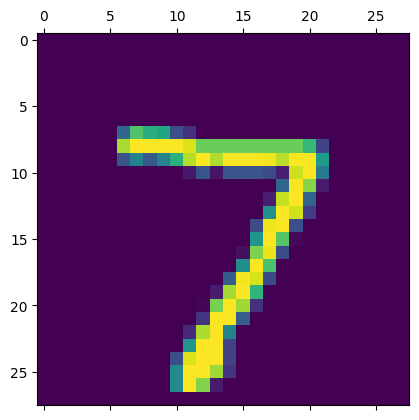

In [16]:
plt.matshow(X_test[0])

In [14]:
y_pred = model.predict(X_test_flattened)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.9426055e-02, 4.9714481e-07, 5.7290938e-02, 9.5165503e-01,
        1.8270232e-03, 8.9961782e-02, 9.8145165e-07, 9.9970937e-01,
        8.6593539e-02, 6.5869910e-01],
       [4.8391926e-01, 5.1875063e-03, 9.9926656e-01, 2.2901809e-01,
        6.0388905e-10, 7.8265464e-01, 7.2837633e-01, 9.2436172e-13,
        1.6559955e-01, 1.2877301e-09],
       [4.6809707e-04, 9.9578661e-01, 6.5367347e-01, 2.8894633e-01,
        2.3833400e-02, 9.3033679e-02, 1.4667001e-01, 1.5124170e-01,
        3.8846496e-01, 4.9160521e-02],
       [9.9953020e-01, 2.2203533e-08, 7.4542835e-02, 6.9557293e-03,
        5.0750881e-05, 7.9795837e-02, 5.6538943e-02, 1.7349131e-02,
        2.6782246e-02, 1.9932348e-02],
       [3.9354339e-02, 4.5692163e-05, 1.5724422e-01, 4.4534151e-03,
        9.9105132e-01, 9.9065518e-03, 8.3351180e-02, 2.3146091e-01,
        2.7328399e-01, 7.5567824e-01]], dtype=float32)

In [15]:
np.argmax(y_pred[0])

np.int64(7)

In [20]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    3,    3,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   6,   11,  917,   18,   12,    4,   10,   11,   39,    4],
       [   3,    1,   19,  925,    1,   17,    1,   10,   25,    8],
       [   2,    1,    4,    1,  922,    0,    6,    4,   10,   32],
       [   9,    3,    5,   38,   11,  765,    8,    7,   40,    6],
       [  15,    3,    9,    1,    8,   12,  902,    2,    6,    0],
       [   1,    6,   22,    5,    8,    0,    0,  950,    4,   32],
       [   8,   11,    5,   18,    9,   18,    7,   11,  881,    6],
       [  11,    7,    1,    8,   29,    6,    0,   17,    8,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

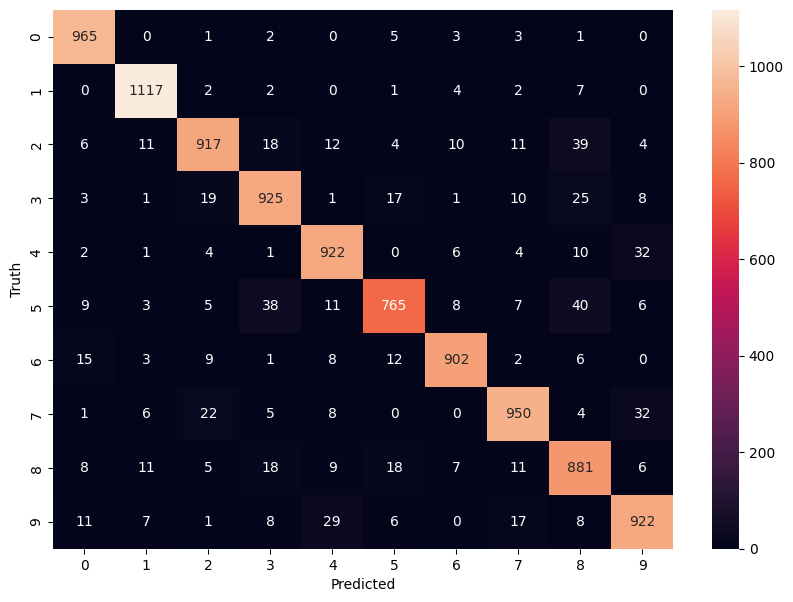

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8713 - loss: 0.4492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9624 - loss: 0.1321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9748 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9848 - loss: 0.0506


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9715 - loss: 0.0926


[0.07885964214801788, 0.9749000072479248]

Text(95.72222222222221, 0.5, 'Truth')

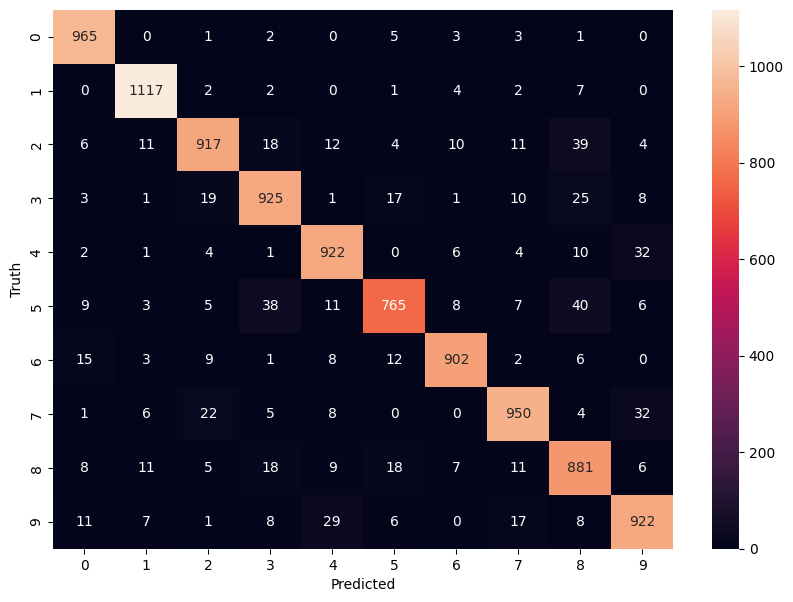

In [27]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')